In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree, svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
# import seaborn as sns
# import math
# from mpl_toolkits.mplot3d import Axes3D

train_df = pd.read_csv("./Assignment3-TrainingData-ModifiedV2.csv")
predict_df = pd.read_csv("./UnknownData_Clean.csv")

In [119]:
# norm_train = {}
# attributes = train_df.columns

# for attribute in attributes:
#     if (attribute != "row ID" and attribute != "QUALIFIED"):
#         minMax_scaler = MinMaxScaler()
#         minMax_scaler.fit_transform(train_df[[attribute]])
        
#         norm_train[attribute] = minMax_scaler.fit_transform(train_df[[attribute]])
        
# for attribute in attributes:
#     if (attribute != "row ID" and attribute != "QUALIFIED"):
#         for y in (0, len(norm_train[attribute]-1)):
#             norm_train[attribute][y] = norm_train[attribute][y][0]
            
# print(norm_train)

In [120]:
inputs = train_df.drop("QUALIFIED", axis="columns").drop("row ID", axis="columns")
target = train_df["QUALIFIED"]
unknownInputs = predict_df.drop("row ID", axis="columns")
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1)

In [121]:
predictInputs

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA
0,4.0,0.0,7.0,1,2.0,8.0,4.0,1910.0,1988.0,1972,...,7.0,6.0,4.0,14.0,6.0,6.0,2.0,5.0,24,1680
1,3.0,1.0,13.0,1,2.0,8.0,5.0,1900.0,2003.0,1984,...,7.0,6.0,4.0,14.0,2.0,6.0,2.0,3.0,24,1680
2,1.0,0.0,7.0,1,2.0,5.0,2.0,1917.0,1988.0,1957,...,7.0,4.0,3.0,14.0,6.0,6.0,2.0,0.0,24,1261
3,3.0,1.0,13.0,1,2.0,8.0,4.0,1906.0,2011.0,1972,...,7.0,6.0,3.0,14.0,6.0,6.0,2.0,1.0,24,1627
4,1.0,1.0,13.0,1,1.0,6.0,2.0,1908.0,1979.0,1950,...,7.0,5.0,3.0,14.0,2.0,6.0,1.0,0.0,11,1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32142,3.0,0.0,1.0,0,3.0,14.0,6.0,1953.0,1999.0,1971,...,2.0,3.0,3.0,14.0,2.0,6.0,3.0,0.0,23,7811
32143,2.0,0.0,1.0,0,2.0,10.0,4.0,1953.0,NaN,1962,...,2.0,3.0,3.0,14.0,2.0,6.0,2.0,0.0,23,4292
32144,3.0,0.0,1.0,0,3.0,12.0,6.0,1953.0,NaN,1962,...,2.0,3.0,3.0,14.0,2.0,3.0,3.0,0.0,23,4232
32145,2.0,0.0,1.0,0,2.0,10.0,4.0,1953.0,NaN,1962,...,2.0,3.0,3.0,14.0,1.0,2.0,2.0,0.0,23,5837


In [122]:
x_test

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA
58821,1,0,13,0,1,5,2,1942,0,1954,...,7,3,3,14,2,6,1,0,11,1152
28912,1,0,7,1,1,6,3,1925,1977,1957,...,7,4,3,14,6,3,1,1,11,1853
9442,2,1,1,1,1,6,3,1900,2011,1964,...,1,3,4,5,2,6,1,0,12,2165
27675,5,1,7,1,1,9,4,1950,0,1974,...,1,7,3,14,11,6,1,1,12,13988
3621,2,1,1,1,1,4,2,1918,2009,1964,...,7,3,4,14,2,3,1,0,11,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57928,2,0,13,0,2,6,2,1941,0,1954,...,2,3,3,14,2,6,2,0,23,1360
44541,1,0,7,1,1,7,3,1940,0,1954,...,7,4,3,14,6,6,1,0,11,2589
1188,2,0,1,1,2,5,3,1900,1969,1967,...,7,4,3,14,2,6,2,0,24,1181
33482,3,1,1,1,1,8,4,1938,2017,1967,...,7,4,5,14,2,6,1,0,11,1310


In [6]:
treePredict = tree.DecisionTreeClassifier()
treePredict = treePredict.fit(x_train, y_train)
y_pred_score = treePredict.predict(x_test) 

In [98]:
def savePrediction(prediction, fileName):
    pd.DataFrame({
        "Predict-Qualified": prediction,
    }).to_csv(fileName, index=False)

In [8]:
results = pd.read_csv("./predictedVsActual.csv")

def evaluatePrediction(prediction, reality):
    confusionMatrix = confusion_matrix(prediction, reality)
    tpr = confusionMatrix[0][0] / (confusionMatrix[0][0] + confusionMatrix[1][0])
    fpr = confusionMatrix[0][1] / (confusionMatrix[0][1] + confusionMatrix[1][1])
    print("Confusion matrix:", confusionMatrix)
    print("TPR:", tpr, "FPR:", fpr)

    total = confusionMatrix[0][0] + confusionMatrix[1][0] + confusionMatrix[0][1] + confusionMatrix[1][1]
    accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / total
    print("Accuracy:", accuracy)
    
evaluatePrediction(y_pred_score, y_test)

Confusion matrix: [[7663  993]
 [ 979 5363]]
TPR: 0.8867160379541773 FPR: 0.15623033354310886
Accuracy: 0.8685158021069476


In [9]:
tree_fpr, tree_tpr, threshold = roc_curve(y_test, y_pred_score)
print(tree_fpr, tree_tpr)

[0.         0.11328396 1.        ] [0.         0.84376967 1.        ]


In [10]:
auc_tree = auc(tree_fpr, tree_tpr)

In [11]:
svmPredict = svm.SVC()
svmPredict.fit(x_train, y_train)
svm_qPrediction = svmPredict.predict(x_test)

In [13]:
evaluatePrediction(svm_qPrediction, y_test)

Confusion matrix: [[7052   59]
 [1590 6297]]
TPR: 0.8160148113862532 FPR: 0.009282567652611706
Accuracy: 0.8900520069342579


In [14]:
svmScore = svmPredict.decision_function(x_test)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svmScore)

In [15]:
# mlpPredict = MLPClassifier(solver="lbfgs", alpha)

In [123]:
randForestPredict = RandomForestClassifier(n_estimators=10)
randForestPredict = randForestPredict.fit(x_train, y_train)
randForestPrediction = randForestPredict.predict(x_test)

evaluatePrediction(randForestPrediction, y_test)

Confusion matrix: [[7609  494]
 [1033 5862]]
TPR: 0.8804674843786161 FPR: 0.0777218376337319
Accuracy: 0.8981864248566476


In [124]:
randForestPredict_whole = randForestPredict.predict(unknownInputs)
savePrediction(randForestPredict_whole, "forestPredict.csv")

In [109]:
randForestPredict_whole

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
randForestPredict_fpr, randForestPredict_tpr, randForestPredict_threshold = roc_curve(y_test, randForestPrediction)

In [18]:
# https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
scores = {}
scores_list = []

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = {
        "score": accuracy_score(y_test, y_pred),
        "prediction": y_pred
    }
    scores_list.append(accuracy_score(y_test, y_pred))
    
print(scores[scores_list.index(max(scores_list))+1])

{'score': 0.8909187891718896, 'prediction': array([0, 0, 1, ..., 0, 1, 0], dtype=int64)}


In [19]:
print(scores_list)

[0.8484464595279371, 0.8171756234164556, 0.8748499799973329, 0.8605147352980398, 0.8823176423523137, 0.8727830377383651, 0.8856514201893586, 0.8799173223096413, 0.8850513401786905, 0.8832511001466862, 0.8883184424589945, 0.8857180957460995, 0.8885851446859582, 0.8865182024269903, 0.8885851446859582, 0.8875850113348447, 0.8909187891718896, 0.8888518469129217, 0.8887851713561808, 0.8888518469129217, 0.8903187091612215, 0.8893852513668489, 0.8901186824909988, 0.8890518735831444, 0.8901853580477397]


In [20]:
kNN_prediction = scores[scores_list.index(max(scores_list))+1]["prediction"]
evaluatePrediction(kNN_prediction, y_test)
kNNPredict_fpr, kNNPredict_tpr, kNNPredict_threshold = roc_curve(y_test, kNN_prediction)

Confusion matrix: [[7249  243]
 [1393 6113]]
TPR: 0.8388104605415413 FPR: 0.0382315921963499
Accuracy: 0.8909187891718896


In [39]:
neuralPredict = MLPClassifier(solver='lbfgs', activation="logistic", hidden_layer_sizes=(21), random_state=1)
neuralPredict = neuralPredict.fit(x_train, y_train)
neuralPrediction = neuralPredict.predict(x_test)

evaluatePrediction(neuralPrediction, y_test)
neural_fpr, neural_tpr, neural_threshold = roc_curve(y_test, neuralPrediction)

Confusion matrix: [[7008   29]
 [1634 6327]]
TPR: 0.8109233973617218 FPR: 0.004562617998741347
Accuracy: 0.8891185491398853


C:\Users\Matthew Ghannoum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [40]:
def displayROC(fpr, tpr, label):
    theAuc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=label+" (AUC = %0.3f)" % theAuc)
    plt.plot([0,1], [0,1], label="Useless Test")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1, 0.75))
    plt.show()

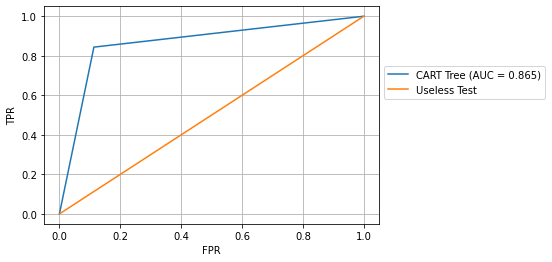

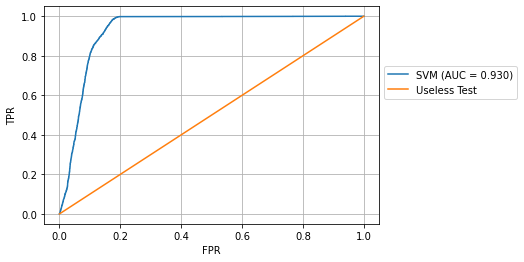

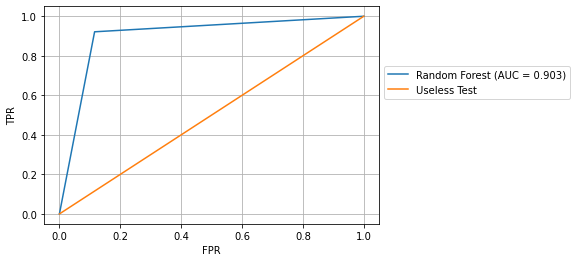

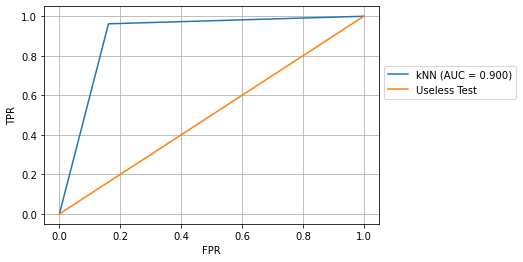

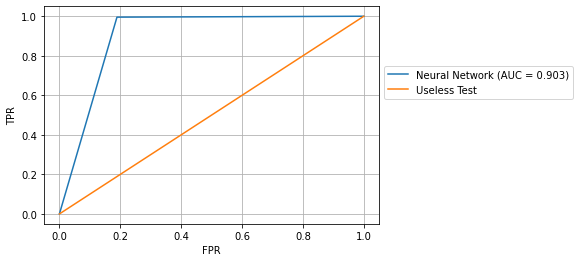

In [41]:
displayROC(tree_fpr, tree_tpr, "CART Tree")
displayROC(svm_fpr, svm_tpr, "SVM")
displayROC(randForestPredict_fpr, randForestPredict_tpr, "Random Forest")
displayROC(kNNPredict_fpr, kNNPredict_tpr, "kNN")
displayROC(neural_fpr, neural_tpr, "Neural Network")

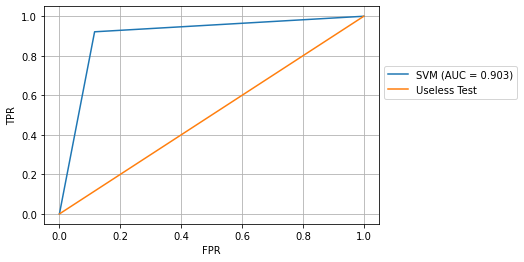

In [35]:
displayROC(randForestPredict_fpr, randForestPredict_tpr)

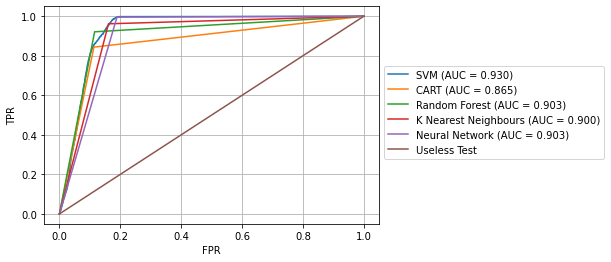

In [42]:
auc_svm = auc(svm_fpr, svm_tpr)
auc_randForest = auc(randForestPredict_fpr, randForestPredict_tpr)
auc_kNN = auc(kNNPredict_fpr, kNNPredict_tpr)
auc_neural = auc(neural_fpr, neural_tpr)

plt.plot(svm_fpr, svm_tpr, label="SVM (AUC = %0.3f)" % auc_svm)
plt.plot(tree_fpr, tree_tpr, label="CART (AUC = %0.3f)" % auc_tree)
plt.plot(randForestPredict_fpr, randForestPredict_tpr, label="Random Forest (AUC = %0.3f)" % auc_randForest)
plt.plot(kNNPredict_fpr, kNNPredict_tpr, label="K Nearest Neighbours (AUC = %0.3f)" % auc_kNN)
plt.plot(neural_fpr, neural_tpr, label="Neural Network (AUC = %0.3f)" % auc_neural)
plt.plot([0,1], [0,1], label="Useless Test")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 0.75))
plt.show()